[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_5_AprendizajeProfundo/code/DL_01_MLP.ipynb)

In [ ]:
# http://www.emergentmind.com/neural-network
# https://hmkcode.com/ai/backpropagation-step-by-step/
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [ ]:
# Revisa la documentacion de python para poder instalar tensorflow.
# Quizas alguno de las siguientes lineas sean de utilidad, o usa la suite anaconda.
# !conda install tensorflow
# !pip install tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X data: (150, 2)
Y data: (150, 2)
L data: (150,)


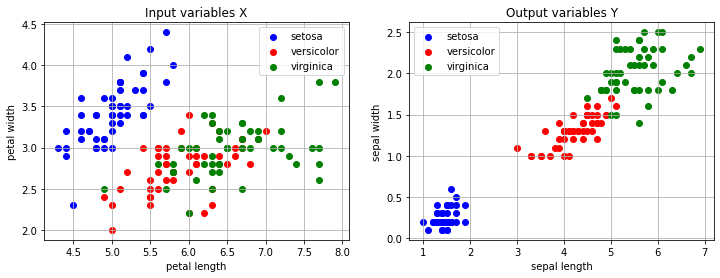

In [2]:
# Load and split data
from sklearn.datasets import load_iris
iris = load_iris()

# We will use length and width of petals as X to predict length and width of sepals as Y
# We also keep the labels in a vector L
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

# Plot it
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

In [3]:
# Split it into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.1)

print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (135, 2)
Test inputs X: (15, 2)
Training + validation outputs Y: (135, 2)
Test outputs Y: (15, 2)
Training + validation labels l: (135,)
Test labels l: (15,)


In [4]:
# Documentación de tensorflow y keras
# https://www.tensorflow.org/
# https://keras.io/

In [5]:
# import tensorflow an the classes Model, Input (place-holder layer), and Dense (fully connected layer)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1ty

In [6]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
i = Input(shape=(2,), name='input')
o = Dense(units=2, activation=None, name='output')(i)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
output (Dense)               (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[-0.31728554 -0.03807497]
 [ 1.1933473   0.65073454]]
Initial biases (2,)
[0. 0.]


In [8]:
# Plot a diagram of the MLP model
from tensorflow.keras.utils import plot_model
plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [9]:
# Here we define the optimizer and loss function
# Adam and mse in this initial example
MLP.compile(optimizer='sgd', loss='mse')

In [10]:
# And now we train the model
# Learn to predict sepal's lenght and width from petal's lenght and width
HISTORY = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=100, validation_split=0.1)

Epoch 1/100
31/31 [==============================] - 0s 4ms/step - loss: 2.8204 - val_loss: 2.0684
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 2.2150 - val_loss: 2.3770
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 1.8176 - val_loss: 2.6234
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 1.5996 - val_loss: 1.5393
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 1.2814 - val_loss: 1.2601
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 1.1196 - val_loss: 1.2528
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 1.0033 - val_loss: 0.9431
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 0.8187 - val_loss: 0.8004
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 0.7535 - val_loss: 0.8384
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 0.7170 - val_loss: 0.6791
Epoch 11/

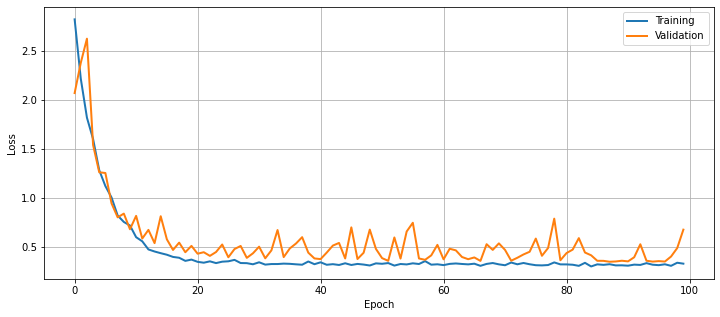

In [11]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [12]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.5529513  0.5942762]
 [-1.6273793 -0.6580528]]
Initial biases (2,)
[-0.85673434 -0.5294041 ]


In [13]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.5119340419769287

In [14]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(15, 2)


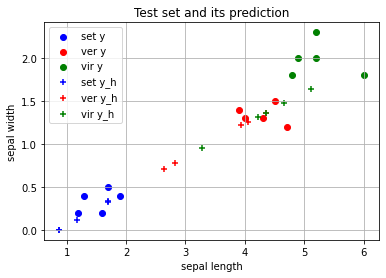

In [15]:
 # Plot y_test_hat
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

In [16]:
# Create a larger MLP
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='sigmoid', name='hidden1')(i)
h = Dense(units=64, activation='sigmoid', name='hidden2')(h)
h = Dense(units=32, activation='sigmoid', name='hidden3')(h)
o = Dense(units=2, activation='sigmoid', name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
hidden1 (Dense)              (None, 32)                96        
_________________________________________________________________
hidden2 (Dense)              (None, 64)                2112      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 2)                 66        
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile it
MLP.compile(optimizer='sgd', loss='mse')

In [18]:
# Train it
MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=2, validation_split=0.1)

Epoch 1/100
16/16 - 0s - loss: 6.9717 - val_loss: 7.5234
Epoch 2/100
16/16 - 0s - loss: 6.2944 - val_loss: 7.1143
Epoch 3/100
16/16 - 0s - loss: 6.0375 - val_loss: 6.9362
Epoch 4/100
16/16 - 0s - loss: 5.9157 - val_loss: 6.8471
Epoch 5/100
16/16 - 0s - loss: 5.8515 - val_loss: 6.7871
Epoch 6/100
16/16 - 0s - loss: 5.8069 - val_loss: 6.7464
Epoch 7/100
16/16 - 0s - loss: 5.7759 - val_loss: 6.7168
Epoch 8/100
16/16 - 0s - loss: 5.7531 - val_loss: 6.6940
Epoch 9/100
16/16 - 0s - loss: 5.7355 - val_loss: 6.6773
Epoch 10/100
16/16 - 0s - loss: 5.7223 - val_loss: 6.6651
Epoch 11/100
16/16 - 0s - loss: 5.7126 - val_loss: 6.6536
Epoch 12/100
16/16 - 0s - loss: 5.7036 - val_loss: 6.6454
Epoch 13/100
16/16 - 0s - loss: 5.6970 - val_loss: 6.6370
Epoch 14/100
16/16 - 0s - loss: 5.6904 - val_loss: 6.6311
Epoch 15/100
16/16 - 0s - loss: 5.6856 - val_loss: 6.6249
Epoch 16/100
16/16 - 0s - loss: 5.6807 - val_loss: 6.6199
Epoch 17/100
16/16 - 0s - loss: 5.6767 - val_loss: 6.6156
Epoch 18/100
16/16 - 0s

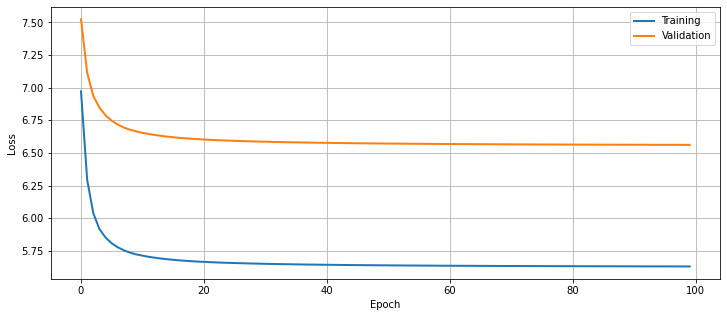

In [19]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [20]:
# Obtain weights and biases of the hidden layer
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t') #print(w)
  print("Biases:  ", b.shape) #print(b)

Weights:  (2, 32)	Biases:   (32,)
Weights:  (32, 64)	Biases:   (64,)
Weights:  (64, 32)	Biases:   (32,)
Weights:  (32, 2)	Biases:   (2,)


In [21]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

5.135266304016113

In [22]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(15, 2)


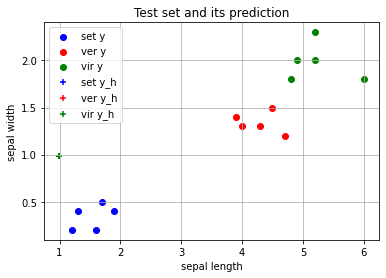

In [23]:
# Plot y_test_hat
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

In [24]:
# Auxiliar function to create an MLP
def create_MLP(n_units=[2, 1], activations=None, last_activation=None):
  h = i = Input(shape=(n_units[0]))
  for units in n_units[1:-1]:
    h = Dense(units=units, activation=activations)(h)
  o = Dense(units=n_units[-1], activation=last_activation)(h)
  return Model(inputs=i, outputs=o)

In [25]:
# Corre el experimento 100 veces y registra el desempeño promedio y el tiempo de ejecución
loss = np.zeros((10, 2))
for ind in range(10):
  MLP = create_MLP([2, 32, 16, 8, 2], activations='sigmoid', last_activation='relu')
  MLP.compile(optimizer='sgd', loss='mse')
  MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=0, validation_split=0.2)
  loss[ind, 0] = MLP.evaluate(x=x_train, y=y_train, verbose=False)
  loss[ind, 1] = MLP.evaluate(x=x_test, y=y_test, verbose=False)
  print(f"Run {ind+1:3d} -- ", end='')
  print(f"Train loss: {loss[ind, 0]:6.4f}", end='; ')
  print(f"Test loss: {loss[ind, 1]:6.4f}")

print("Average -- ", end='')
print(f" train loss: {loss[:, 0].mean():6.4f} +- {loss[:, 0].std():6.4f}", end='; ')
print(f" test loss: {loss[:, 1].mean():6.4f} +- {loss[:, 1].std():6.4f}")

Run   1 -- Train loss: 1.8148; Test loss: 1.4685
Run   2 -- Train loss: 9.6823; Test loss: 9.0270
Run   3 -- Train loss: 9.6823; Test loss: 9.0270
Run   4 -- Train loss: 1.8484; Test loss: 1.4989
Run   5 -- Train loss: 2.4183; Test loss: 2.1171
Run   6 -- Train loss: 9.6823; Test loss: 9.0270
Run   7 -- Train loss: 9.6823; Test loss: 9.0270
Run   8 -- Train loss: 9.6823; Test loss: 9.0270
Run   9 -- Train loss: 8.9630; Test loss: 8.2815
Run  10 -- Train loss: 8.9592; Test loss: 8.2778
Average --  train loss: 7.2416 +- 3.4278;  test loss: 6.6779 +- 3.2785
